In [211]:
import numpy as np
import math
import pandas as pd
import string
import matplotlib.pyplot as plt
import re
import operator
%cd '/Users/xiaoyingliu/desktop'

/Users/xiaoyingliu/Desktop


In [279]:
#1.What is the entropy over words in English?
words=pd.read_csv('WordFrequencies.csv', header=None, index_col=0, squeeze=True).to_dict()
words= {str(k):float(v) for k,v in words.items()}

In [280]:
def compute_entropy(words):
    entropy=0
    for i in words:
        prob=words[i] #get the probability
        entropy+=prob*np.log2(1./prob)
    return entropy
    

In [214]:
def normalization(words):
    factor=1.0/sum(words.values())
    for k in words:
        words[k] = words[k]*factor
    return words

In [282]:
normalized_words=normalization(words)

In [284]:
compute_entropy(normalized_words)

11.488297514501706

In [285]:
#2.Using your answer from Q1, decide whether the game “20 questions”1 is a fair game—can
#you win more than half the time—assuming (a) if the word being guessed is chosen according to
#frequency, and (b) if the word is chosen uniformly
#(a) if the word is chosen according to frequency, we already get the entropy of the words in #1 as 11.4882975 which is less than 20. Thus the 20 
#question game is fair under such circumstances, since we will only need 12 bits of information to get the certain result( which is equivalent to asking
#12 questions). And we can actually ask 20 questions and obtain 20 bits of informtion. Thus on average we win each time. 
#(b) 
word_count=len(words.keys())
for k in words:
    words[k]=1/word_count
uniform_words=words

In [286]:
compute_entropy(uniform_words)
#similarly, 20 questions is still a fair game, since we need to obtain 16 bits of information to get a certain outcome which is smaller than the number 
#of questions we can ask.

15.080984034059139

In [290]:
words=pd.read_csv('WordFrequencies.csv', header=None, index_col=0, squeeze=True).to_dict()
words= {str(k):float(v) for k,v in words.items()}
normalized_words=normalization(words)

In [291]:
#3.Make a plot of the conditional entropy over words in English, conditioning on the first
#character (e.g. one bar for “a”, one for “b”, one for “c”, etc.).
#construct dics
chars=list(string.ascii_lowercase)
all_fl_dics=[]  #all 26 dictionaries generated.will append in order of a,b,c.....
def fl_generator(words):
    for i in chars:
        new={}
        for j in list(words.keys()):
            if i==j[0]:
                new.update({j:words[j]}) #takes in a dic
        all_fl_dics.append(new)  
    return all_fl_dics

In [292]:
all_fl_dics=fl_generator(normalized_words)

In [293]:
#compute conditional entropy 
def compute_conditional_entropy(all_fl_dics):
    p_list=[]
    y=[]
    for i in all_fl_dics:
        p_list.append(sum(i.values()))
    for i in all_fl_dics:
        i=normalization(i)
    condi_e=0
    for i in range(0,len(all_fl_dics)):
        y.append(compute_entropy(all_fl_dics[i])*p_list[i])
        condi_e+=compute_entropy(all_fl_dics[i])*p_list[i]
    return condi_e,y

In [294]:
fl_entropy=compute_conditional_entropy(all_fl_dics)[0]

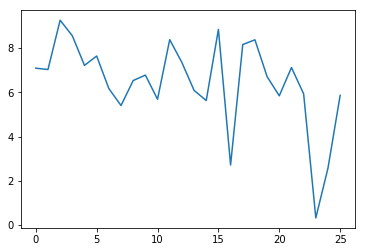

In [295]:
x=range(0,26)
y=compute_conditional_entropy(all_fl_dics)[1]
plt.plot(x,y)

In [296]:
#4.Plot the information about word identity that is conveyed by (1) the first character, (2) the
#last character, or (3) the first vowel (aeiou). Which of these would you predict then is most important
#for word recognition?
H_words=compute_entropy(normalized_words)
#(a)
fl_info=H_words-fl_entropy

In [297]:
fl_info

4.338063902281873

In [298]:
#(b)
#ll_generator, get all_ll_dics, and get ll_infor=ll_entropy-ll_conditional_entropy
all_ll_dics=[]
def ll_generator(words):
    for i in chars:
        new={}
        for j in list(words.keys()):
            if i==j[len(j)-1]:
                new.update({j:words[j]}) #takes in a dic
        all_ll_dics.append(new)  
    return all_ll_dics

In [299]:
all_ll_dics=ll_generator(normalized_words)

In [263]:
ll_entropy=compute_conditional_entropy(all_ll_dics)[0]

In [300]:
ll_info=H_words-ll_entropy 

In [301]:
ll_info

0.1288473243195245

In [302]:
#(c)
#fv_generator, get all_fv_dics, and get fv_info=fv_entropy-fv_conditional_entropy
all_fv_dics=[]
vowels=['a','e','i','o','u']
def fv_generator(words):
    for each in vowels:
        new={}
        for k in list(words.keys()):
            fv_pos = [ i for i,v in enumerate(k) if v.lower() in vowels ]
            if not fv_pos ==[]:
                if k[fv_pos[0]]==each:
                    new.update({k:words[k]}) #takes in a dic
        all_fv_dics.append(new)  
    return all_fv_dics
    

In [303]:
all_fv_dics=fv_generator(normalized_words)

In [304]:
fv_entropy=compute_conditional_entropy(all_fv_dics)[0]

In [305]:
fv_info=H_words-fv_entropy

In [306]:
fv_info

2.4492926945595723

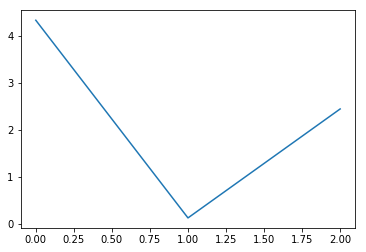

In [307]:
info_list=[fl_info,ll_info,fv_info]
x=range(0,3)
plt.plot(x,info_list)
plt.show()
#According to the plot, the most important indicator for words is the last letter. Since the last letter contain the smallest information 
#out of the three.

In [308]:
#5.For each word length (1, 2, 3, …) plot the average surprisal of words that are that length (i.e.
#plot the averages, not a point for each word). Generally, what would this plot look like if English were
#an efficient code in Shannon's sense? Qualitatively describe in 1-2 sentences places where your plot
#does or does not agree with an efficient code.
def average_surprisal(words):
    sum_of_surprisal=0
    for i in words:
        sum_of_surprisal+=np.log(1./words[i])
    return sum_of_surprisal/len(words)

    
all_eq_dics=[]  
def equal_len_generator(words): #tested that max length is 37 
    for i in range(0,37):
        new={}
        for j in list(words.keys()):
            if len(j)==i:
                new.update({j:words[j]})  
        all_eq_dics.append(new)
    return all_eq_dics

In [309]:
all_eq_dics=equal_len_generator(normalized_words)
while {} in all_eq_dics:
    all_eq_dics.remove({}) # remove the lengths where there are no words

In [310]:
avgs=[]
for i in all_eq_dics:
    avgs.append(average_surprisal(i))

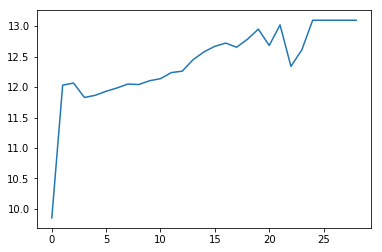

In [311]:
#make plots for average surprisal and explanation
plt.plot(range(0,29),avgs)

In [ ]:
# In shannon's sense, according to ppt, higher probability events have shorter codewords, while lower probability events have longer codewords. 
#For instance, words starting with first letter as z are relatively fewer, this is a low probability event, and its codewords are quite long. This makes 
#perfect sense. English is an efficient code.

In [241]:
#6. Perhaps the most frequent words are “more optimized” to be like an efficient
#code. Come up with a measure of how well word length agrees with surprisal (as in Q5), and plot that
#measure for the most frequent N words, N=10, 20, 30, ... for the entire lexicon (each plotted set here
#should be cumulative, including words 1 through N). What does your plot indicate about this
#possibility?

#Measurement. I will rearrange the dictionary with descending frequency of words. Then I can get the average surprisal for the most frequent N words
#(N=10,20,30...cumulative). I will be getting the average length for the most frequent N words. And plot these two variables accordingly to see if they 
#follow a linear pattern. 

In [242]:
words=pd.read_csv('WordFrequencies.csv', header=None, index_col=0, squeeze=True).to_dict()
words= {str(k):float(v) for k,v in words.items()}
normalized_words=normalization(words)

In [200]:
sorted_words = sorted(words.items(), key=lambda x: x[1])

In [243]:
sorted_words=sorted_words[::-1]

In [244]:
#compute avg surprisal on sorted dic
def compute_avg_surp(sorted_words):
    i=10
    avg_surp=[]
    while i< len(sorted_words):
        avg_surp.append(average_surprisal(dict(sorted_words[0:i])))
        i+=10
    return avg_surp

In [206]:
avg_surp=compute_avg_surp(sorted_words)

In [208]:
#compute avg word length on sorted dic
def compute_avg_len(sorted_words):
    avg_len=[]
    i=10
    while i<len(sorted_words):
        sum=0
        for j in dict(sorted_words[0:i]).keys():
            sum+=len(j)
        avg_len.append(sum/i)
        i+=10
    return avg_len

In [209]:
avg_len=compute_avg_len(sorted_words)

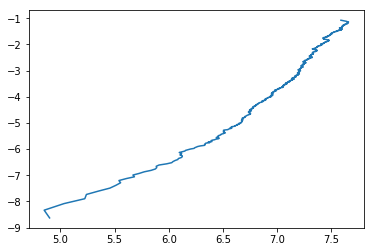

In [210]:
plt.plot(avg_len,avg_surp)
plt.show()

In [ ]:
#conclusion: the codelength and actual length of the most frequent words in English are perfectly positive related, which means that 
#most frequent words are “more optimized” to be like an efficient code makes sense. 